In [1]:
import matplotlib.pyplot as plt
import numpy as np

TotalChips = int(100)                              # specify number of chips you are using for data
TotalCryo = int(4); Cryocycles = [0,5,20,100]    # specify cryocyles

T = []
# Need to adjust the numbering of the chips
# We start at 20 for this batch
for i in range(TotalChips):
    T.append(i+20)

# Create strings so it can automatically read in txt data
chips = []
for i in range(TotalChips):
    a = 'chip' + str(i+20)
    chips = np.append(chips,a)
data = []; txt = []
for i in range(len(chips)):
    data.append([]); txt.append([])
for i in range(len(chips)):
    for j in Cryocycles:
        e = 'DataRT' + str(j) + str(chips[i])
        data[i] = np.append(data[i],e)
        f = str(chips[i]) + 'RT' + str(j) + '.dat'
        txt[i] = np.append(txt[i],f)   # stores the actual data file's name we wish to extract from

# extract data to RMS,Mean,Gain,Ch,PF arrays
# Data[i][j][k] = RMS[chip#][Cryocycle#][channel#]
RMS = np.zeros((len(chips),len(Cryocycles),16))
Mean = np.zeros((len(chips),len(Cryocycles),16))
Ch = np.zeros((len(chips),len(Cryocycles),16))
PF = np.zeros((len(chips),len(Cryocycles),16))
Gain = np.zeros((len(chips),len(Cryocycles),16))

for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        r = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        rr = r.T[0]
        RMS[j][i] = rr[:]
        m = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        mm = m.T[1]
        Mean[j][i] = mm[:]
        cc = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        ccc = cc.T[2]
        Ch[j][i] = ccc[:]
        p = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        passfail = p.T[3]
        PF[j][i] = passfail[:]
        g = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        gg = g.T[4]
        Gain[j][i] = gg[:]
        
# Normalize the channel Numbers
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        for k in range(len(Ch[i][j])):
            if 32. > Ch[i][j][k] > 15.:
                Ch[i][j][k] = Ch[i][j][k] - 16.
            if 48. > Ch[i][j][k] > 31.:
                Ch[i][j][k] = Ch[i][j][k] - 32.
            if Ch[i][j][k] > 47.:
                Ch[i][j][k] = Ch[i][j][k] - 48.
                
# Fill lists of lists based off of Pass-Fail
# passRMS, etc... will be filled with data on passed values; failRMS with failed
passRMS = []; passMean = []; passCh = []; passPF = []; passGain = []
failRMS = []; failMean = []; failCh = []; failPF = []; failGain = []

# create a list of lists - containing each chip as a seperate index
for i in range(len(chips)):
    passRMS.append(([])); passMean.append(([])); passCh.append(([])); passPF.append(([])); passGain.append(([]))
    failRMS.append(([])); failMean.append(([])); failCh.append(([])); failPF.append(([])); failGain.append(([]))
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        passRMS[i].append(([])); passMean[i].append(([])); 
        passCh[i].append(([])); passPF[i].append(([])); passGain[i].append(([]))
        failRMS[i].append(([])); failMean[i].append(([]));
        failCh[i].append(([])); failPF[i].append(([])); failGain[i].append(([]))
# append data to the associated lists, based off of P/F
for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[j][i][k] == 0.:
                passRMS[j][i].append((RMS[j][i][k])); passMean[j][i].append((Mean[j][i][k]));
                passCh[j][i].append((Ch[j][i][k]))
                passPF[j][i].append((PF[j][i][k])); passGain[j][i].append((Gain[j][i][k])) 
            if PF[j][i][k] == 1.:
                failRMS[j][i].append((RMS[j][i][k])); failMean[j][i].append((Mean[j][i][k]));
                failCh[j][i].append((Ch[j][i][k]))
                failPF[j][i].append((PF[j][i][k])); failGain[j][i].append((Gain[j][i][k]))

print('done')

done


RT[20] 74
RT[5] 95
RT[20] 95


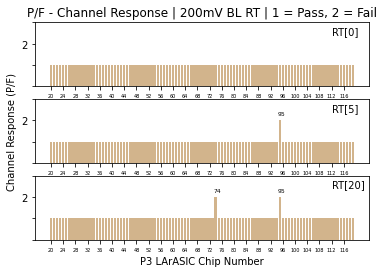

done


In [2]:
'''plt.save file format'''
### Use this one ###

# Thanks to CE talk (12/6/21) by H. Chen (DUNE TPC Electronics Consortium Meeting) for plot idea

chip = []
PFchips = np.ones((len(chips),len(Cryocycles),1))
for i in range(20,len(chips)+20):
    chip.append(i)
    
# Designate y-values either 1 or 2 (ASIC Passes or Fails for all channels)
for i in range(len(PF)):
    for j in range(len(Cryocycles)):
        for k in range(0,16):
            # Exclude Disconnections (6000 adc)
            if PF[i][j][k] == 1. and (Mean[i][j][k] > 6500. or Mean[i][j][k] < 5500.):
                PFchips[i][j] = 2.

# Create bar plots for each Cryocycle
fig, (a,b,c) = plt.subplots(3)
for i in range(len(chips)):
    a.bar(chip[i],PFchips[i][0],color='tan')
    b.bar(chip[i],PFchips[i][1],color='tan')
    c.bar(chip[i],PFchips[i][2],color='tan')
    if PFchips[i][0] == 2.:
        a.text(chip[i]-.75,2.25,chip[i],size=6)
        print('RT[0] ' + str(chip[i]))
    if PFchips[i][1] == 2.:
        b.text(chip[i]-.75,2.25,chip[i],size=6)
        print('RT[5] ' + str(chip[i]))
    if PFchips[i][2] == 2.:
        c.text(chip[i]-.75,2.25,chip[i],size=6)
        print('RT[20] ' + str(chip[i]))
    
# setting x-ticks for all the ASICs - too many for each one, so only label every 4
a.set_xticks(range(20,len(chip)+20,4)); b.set_xticks(range(20,len(chip)+20,4));
c.set_xticks(range(20,len(chip)+20,4))
a.tick_params(axis = 'x', labelsize=5); b.tick_params(axis = 'x', labelsize=5);
c.tick_params(axis = 'x', labelsize=5)

# Y-axis tick marks -- only displaying the '2' value
for n, label in enumerate(a.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(b.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)
for n, label in enumerate(c.yaxis.get_ticklabels()):
    if n != 2. and n != 4.:
        label.set_visible(False)

a.set_ylim([0,3.0]); b.set_ylim([0,3.0]); c.set_ylim([0,3.0])
a.set_title('P/F - Channel Response | 200mV BL RT | 1 = Pass, 2 = Fail')
b.set_ylabel('Channel Response (P/F)')
c.set_xlabel('P3 LArASIC Chip Number')
a.text(len(chips)+12,2.45,'RT[0]',size=10)
b.text(len(chips)+12,2.45,'RT[5]',size=10)
c.text(len(chips)+12,2.45,'RT[20]',size=10)

path = '../../../../test.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')

plt.show()

print('done')

RT[100] 49
RT[20] 74
RT[100] 74
RT[5] 95
RT[20] 95
RT[100] 95
RT[100] 111
RT[100] 114


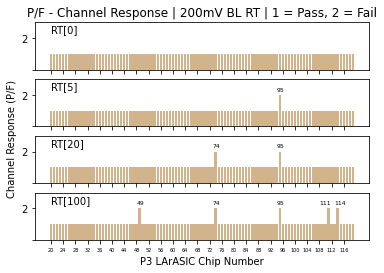

done


In [3]:
### Other version for [100] Cryocycles - 4 subplots

chip = []
PFchips = np.ones((len(chips),len(Cryocycles),1))
for i in range(20,len(chips)+20):
    chip.append(i)
    
# Designate y-values either 1 or 2 (ASIC Passes or Fails for all channels)
for i in range(len(PF)):
    for j in range(len(Cryocycles)):
        for k in range(0,16):
        # Exclude Disconnections (6000 adc)
            if PF[i][j][k] == 1. and (Mean[i][j][k] > 6500. or Mean[i][j][k] < 5500.):
                PFchips[i][j] = 2.

# Create bar plots for each Cryocycle
fig, (a,b,c,d) = plt.subplots(4)
for i in range(len(chips)):
    a.bar(chip[i],PFchips[i][0],color='tan')
    b.bar(chip[i],PFchips[i][1],color='tan')
    c.bar(chip[i],PFchips[i][2],color='tan')
    d.bar(chip[i],PFchips[i][3],color='tan')
    if PFchips[i][0] == 2.:
        a.text(chip[i]-1,2.25,chip[i],size=6)
        print('RT[0] ' + str(chip[i]))
    if PFchips[i][1] == 2.:
        b.text(chip[i]-1,2.25,chip[i],size=6)
        print('RT[5] ' + str(chip[i]))
    if PFchips[i][2] == 2.:
        c.text(chip[i]-1,2.25,chip[i],size=6)
        print('RT[20] ' + str(chip[i]))
    if PFchips[i][3] == 2.:
        # Back to back (ASICs 111 and 114 overlap), so we need to seperate them by hand
        if i == 91:
            d.text(chip[i]-3,2.25,chip[i],size=6)
            print('RT[100] ' + str(chip[i]))
        elif i == 94:
            d.text(chip[i]-1,2.25,chip[i],size=6)
            print('RT[100] ' + str(chip[i]))
        else:
            d.text(chip[i]-1,2.25,chip[i],size=6)
            print('RT[100] ' + str(chip[i]))
    
# setting x-ticks for all the ASICs - too many for each one, so only label every 4
a.set_xticks(range(20,len(chip)+20,4)); b.set_xticks(range(20,len(chip)+20,4))
c.set_xticks(range(20,len(chip)+20,4)); d.set_xticks(range(20,len(chip)+20,4))
# Turn off numbers on xticks for the top 3 subplots, so we only have ASIC numbers on the bottom subplot
a.set_xticklabels([]); b.set_xticklabels([]); c.set_xticklabels([])
a.tick_params(axis = 'x', labelsize=5); b.tick_params(axis = 'x', labelsize=5)
c.tick_params(axis = 'x', labelsize=5); d.tick_params(axis = 'x', labelsize=5)

# Y-axis tick marks -- only displaying the '2' value
for n, label in enumerate(a.yaxis.get_ticklabels()):
    if n == 0.: #and n != 4.:
        label.set_visible(False)
for n, label in enumerate(b.yaxis.get_ticklabels()):
    if n == 0.: #and n != 4.:
        label.set_visible(False)
for n, label in enumerate(c.yaxis.get_ticklabels()):
    if n == 0.: #and n != 4.:
        label.set_visible(False)
for n, label in enumerate(d.yaxis.get_ticklabels()):
    if n == 0.: #and n != 4.:
        label.set_visible(False)

a.set_ylim([0,3.0]); b.set_ylim([0,3.0]); c.set_ylim([0,3.0]); d.set_ylim([0,3.0])
a.set_title('P/F - Channel Response | 200mV BL RT | 1 = Pass, 2 = Fail')
b.set_ylabel('Channel Response (P/F)', loc = 'top')
d.set_xlabel('P3 LArASIC Chip Number')
a.text(20,2.35,'RT[0]',size=10)
b.text(20,2.35,'RT[5]',size=10)
c.text(20,2.35,'RT[20]',size=10)
d.text(20,2.35,'RT[100]',size=10)

path = '../../../../RT Channel Response.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')

plt.show()

print('done')

### Channel (all 1600) displayed for channel response plot

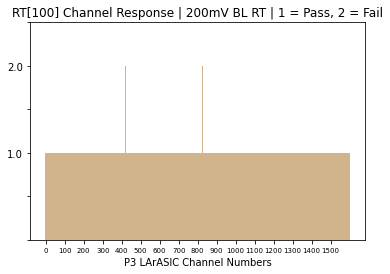

done


In [30]:
from tqdm.notebook import trange, tqdm      # progress bar

ChaCha = []  # channels
PFchannels = np.ones((len(Cryocycles),1600))
for i in range(0,1600):
    ChaCha.append(i)
    
# Designate y-values either 1 or 2 (ASIC Passes or Fails for all channels)
for c in range(len(Cryocycles)):
    for i in range(0,100):
        for j in range(0,16):
        # Exclude Disconnections (6000 adc)
            if PF[i][c][j] == 1. and (Mean[i][c][j] > 6250. or Mean[i][c][j] < 5750.):
                PFchannels[c][j+(j*i)] = 2.

# Create bar plots --- This one is only for comparison between RT[0] and RT[100]
fig, (a) = plt.subplots(1)
a.bar(ChaCha,PFchannels[3],color='tan',width=3)
    
# setting x-ticks for all the ASICs - too many for each one, so only label every 4
a.set_xticks(range(0,1600,100))
a.tick_params(axis = 'x', labelsize=7)

# Y-axis tick marks -- only displaying the '2' value
for n, label in enumerate(a.yaxis.get_ticklabels()):
    label.set_visible(False)
    if n == 2. or n == 4.:   # Tick marks denoted by how many there are (n = 2 is y = 1.0, n = 4 is y = 2.0)
        label.set_visible(True)

a.set_ylim([0,2.5])
a.set_title('RT[100] Channel Response | 200mV BL RT | 1 = Pass, 2 = Fail')
#a.set_ylabel('Channel Response (P/F)')
a.set_xlabel('P3 LArASIC Channel Numbers')
#a.text(100,2.35,'RT[100]',size=10)

path = '../../../../RT[100] Channel Response - all channels.png'
plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')

plt.show()

print('done')